In [4]:
import json
with open("../../test_results0", 'r') as f:
    results = json.load(f)

In [5]:
patient_list = [int(x.split('patients')[0]) for x in results['first_test_patient=1']['trained_models0'].keys()]

KeyError: 'first_test_patient=1'

In [81]:
import numpy as np
sup_test_accs = list()
log_test_accs = list()
tuned_test_accs = list()
for test_set in results.values():
    for model_version in test_set.values():
        sup_test_accs.append([x['sup_res'][0]['test_acc'] for x in model_version.values()])
        log_test_accs.append([x['logistic_res'][0]['test_acc'] for x in model_version.values()])
        tuned_test_accs.append([x['fully_tuned_res'][0]['test_acc'] for x in model_version.values()])

In [91]:
sup_test_acc = np.mean(np.array(sup_test_accs),0)
log_test_acc = np.mean(np.array(log_test_accs),0)
tuned_test_acc = np.mean(np.array(tuned_test_accs), 0)

In [88]:
np.array(sup_test_accs[9:12])

array([[0.59584063, 0.61425942, 0.65206176, 0.66976267, 0.69657201,
        0.70704895, 0.72145194],
       [0.62767535, 0.61710864, 0.63267827, 0.6713106 , 0.68759817,
        0.70669001, 0.72046483],
       [0.56730384, 0.5610221 , 0.62619466, 0.68021715, 0.70238256,
        0.70996547, 0.72528827]])

In [18]:
sup_test_acc = np.mean(np.array([[x['sup_res'][0]['test_acc'] for x in results[i].values()] for i in range(len(file_names))]), 0)
log_test_acc = np.mean(np.array([[x['logistic_res'][0]['test_acc'] for x in results[i].values()] for i in range(len(file_names))]), 0)
tuned_test_acc = np.mean(np.array([[x['fully_tuned_res'][0]['test_acc'] for x in results[i].values()] for i in range(len(file_names))]), 0)

In [79]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size']

10.0

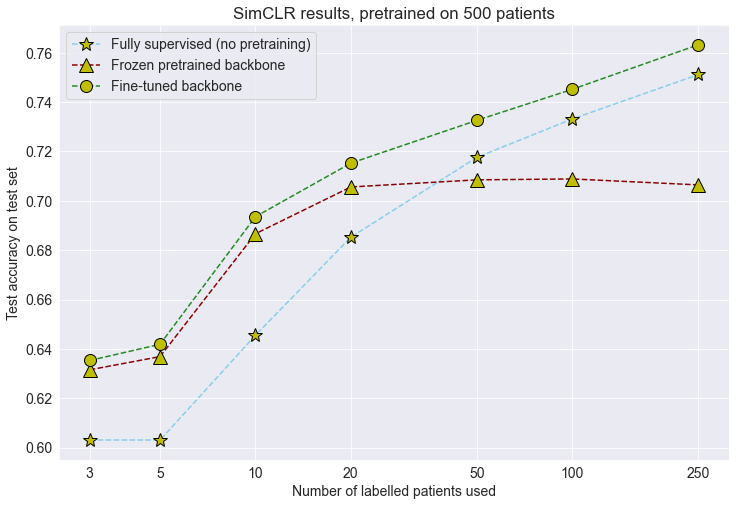

In [93]:
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
plt.plot(patient_list, sup_test_acc, '--', color="skyblue", marker="*", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, log_test_acc, '--', color="darkred", marker="^", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, tuned_test_acc, '--', color="forestgreen", marker="o", markeredgecolor="#000", markerfacecolor="y", markersize=12)
plt.xscale("log")
plt.xticks(patient_list, labels=patient_list)
plt.title("SimCLR results, pretrained on 500 patients")
plt.xlabel("Number of labelled patients used")
plt.ylabel("Test accuracy on test set")
plt.minorticks_off()
plt.legend(["Fully supervised (no pretraining)", "Frozen pretrained backbone", "Fine-tuned backbone"])
plt.savefig('simclr_graph_testacc.png', facecolor="white")
plt.show()